### Table 1: Vaccine hesitancy statistics by county

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt

We start by reading the csv into a data frame and deleting the columns that we don't need such as the state boundaries, county boundaries, and geographical point (longtitide and latitude). 

In [23]:
hesitancy_df = pd.read_csv('/Users/tobymendels/downloads/Vaccine_Hesitancy_for_COVID-19__County_and_local_estimates.csv')
hesitancy_df.drop(labels=['County Boundary', 'State Boundary', 'Geographical Point'], axis=1, inplace=True)
hesitancy_df.head()

,FIPS Code,County Name,State,Estimated hesitant,Estimated hesitant or unsure,Estimated strongly hesitant,Social Vulnerability Index (SVI),SVI Category,CVAC level of concern for vaccination rollout,CVAC Level Of Concern,Percent adults fully vaccinated against COVID-19 (as of 6/10/21),Percent Hispanic,Percent non-Hispanic American Indian/Alaska Native,Percent non-Hispanic Asian,Percent non-Hispanic Black,Percent non-Hispanic Native Hawaiian/Pacific Islander,Percent non-Hispanic White,State Code
0,1123,"Tallapoosa County, Alabama",ALABAMA,0.1806,0.2400,0.1383,0.89,Very High Vulnerability,0.64,High Concern,0.305,0.0242,0.0022,0.0036,0.2697,0.0000,0.6887,AL
1,1121,"Talladega County, Alabama",ALABAMA,0.1783,0.2350,0.1368,0.87,Very High Vulnerability,0.84,Very High Concern,0.265,0.0229,0.0043,0.0061,0.3237,0.0003,0.6263,AL
2,1131,"Wilcox County, Alabama",ALABAMA,0.1735,0.2357,0.1337,0.93,Very High Vulnerability,0.94,Very High Concern,0.394,0.0053,0.0009,0.0003,0.6938,0.0000,0.2684,AL
3,1129,"Washington County, Alabama",ALABAMA,0.1735,0.2357,0.1337,0.73,High Vulnerability,0.82,Very High Concern,0.308,0.0146,0.0731,0.0025,0.2354,0.0000,0.6495,AL
4,1119,"Sumter County, Alabama",ALABAMA,0.1808,0.2526,0.1390,0.96,Very High Vulnerability,0.96,Very High Concern,0.362,0.0053,0.0007,0.0214,0.7192,0.0000,0.2481,AL


Then we can make a correlation table of all the quantitaive variables to get some ideas of what variables correlate with what. This will help give us a basic idea of what we should look at more and what we will be able to take away from this data table. We can also look at some basic summary statistics for the variables to give us a better picture of the data

In [4]:
variables = ['Estimated hesitant', 
             'Estimated hesitant or unsure', 
             'Estimated strongly hesitant', 
             'Social Vulnerability Index (SVI)',
              'CVAC level of concern for vaccination rollout',
               'Percent adults fully vaccinated against COVID-19 (as of 6/10/21)',
                'Percent Hispanic',
                'Percent non-Hispanic American Indian/Alaska Native',
                'Percent non-Hispanic Asian',
                'Percent non-Hispanic Black',
                'Percent non-Hispanic Native Hawaiian/Pacific Islander',
                'Percent non-Hispanic White'
                     ]
hesitancy_df[variables].corr()

,Estimated hesitant,Estimated hesitant or unsure,Estimated strongly hesitant,Social Vulnerability Index (SVI),CVAC level of concern for vaccination rollout,Percent adults fully vaccinated against COVID-19 (as of 6/10/21),Percent Hispanic,Percent non-Hispanic American Indian/Alaska Native,Percent non-Hispanic Asian,Percent non-Hispanic Black,Percent non-Hispanic Native Hawaiian/Pacific Islander,Percent non-Hispanic White
Estimated hesitant,1.000000,0.961811,0.975274,0.282310,0.338086,-0.199502,-0.210853,0.173319,-0.269042,0.159336,-0.047019,0.000838
Estimated hesitant or unsure,0.961811,1.000000,0.938115,0.386490,0.438484,-0.277029,-0.195632,0.154750,-0.303635,0.288680,-0.064783,-0.085858
Estimated strongly hesitant,0.975274,0.938115,1.000000,0.299722,0.350317,-0.205624,-0.205454,0.198035,-0.263052,0.171879,-0.048325,-0.023501
Social Vulnerability Index (SVI),0.282310,0.386490,0.299722,1.000000,0.717859,-0.276399,0.313903,0.167560,-0.058608,0.475836,0.000462,-0.615726
CVAC level of concern for vaccination rollout,0.338086,0.438484,0.350317,0.717859,1.000000,-0.401594,0.323777,0.139995,-0.139841,0.359244,0.002739,-0.512439
Percent adults fully vaccinated against COVID-19 (as of 6/10/21),-0.199502,-0.277029,-0.205624,-0.276399,-0.401594,1.000000,0.096973,0.148729,0.266810,-0.253635,0.067014,0.042492
Percent Hispanic,-0.210853,-0.195632,-0.205454,0.313903,0.323777,0.096973,1.000000,-0.042063,0.138102,-0.115655,0.017473,-0.601836
Percent non-Hispanic American Indian/Alaska Native,0.173319,0.154750,0.198035,0.167560,0.139995,0.148729,-0.042063,1.000000,-0.018333,-0.102222,0.017776,-0.293375
Percent non-Hispanic Asian,-0.269042,-0.303635,-0.263052,-0.058608,-0.139841,0.266810,0.138102,-0.018333,1.000000,0.016760,0.375992,-0.279602
Percent non-Hispanic Black,0.159336,0.288680,0.171879,0.475836,0.359244,-0.253635,-0.115655,-0.102222,0.016760,1.000000,-0.036959,-0.591361


In [20]:
hesitancy_df[variables].describe()

,Estimated hesitant,Estimated hesitant or unsure,Estimated strongly hesitant,Social Vulnerability Index (SVI),CVAC level of concern for vaccination rollout,Percent adults fully vaccinated against COVID-19 (as of 6/10/21),Percent Hispanic,Percent non-Hispanic American Indian/Alaska Native,Percent non-Hispanic Asian,Percent non-Hispanic Black,Percent non-Hispanic Native Hawaiian/Pacific Islander,Percent non-Hispanic White
count,3142.000000,3142.000000,3142.000000,3141.000000,3142.000000,2864.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000
mean,0.132600,0.191429,0.086653,0.500000,0.499965,0.399398,0.094184,0.018463,0.013621,0.089259,0.000919,0.762499
std,0.046337,0.053494,0.032938,0.288842,0.288832,0.142893,0.138647,0.076340,0.027665,0.144283,0.006240,0.202157
min,0.026900,0.049900,0.018600,0.000000,0.000000,0.001000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006900
25%,0.098300,0.148500,0.062325,0.250000,0.250000,0.318000,0.022200,0.001200,0.002800,0.006500,0.000000,0.644450
50%,0.131800,0.190100,0.084900,0.500000,0.500000,0.400000,0.042300,0.002800,0.006100,0.021900,0.000100,0.837400
75%,0.161725,0.228800,0.104475,0.750000,0.750000,0.494000,0.096800,0.006900,0.012800,0.098400,0.000600,0.924875
max,0.267000,0.323300,0.182400,1.000000,1.000000,0.999000,0.991700,0.919000,0.417300,0.872300,0.272700,1.000000


We can see that the 3 columns that talk about hesitancy are very strongly correlated, and when we look at summary statistics, we can see that on average the "Estimated hesitant or unsure" is slightly higher than the "Estimated hesitant" and the "Estimated strongly hesitant" is slightly below. Knowing this, we will look only at the "Estimated hesitant" column in order to simplify things.

In [21]:
hesitancy_df.drop(labels=['Estimated hesitant or unsure', 'Estimated strongly hesitant'], axis=1, inplace=True)

The social vulernability index is define as "a database that helps emergency response planners and public health officials identify, map, and plan support for communities that will most likely need support before, during, and after a public health emergency." It acts as an estimate of how much support a county will need in the event of a punlic health emergency based off a large number of factors. Below we can make a scatter of the percent of a county that is white compared to the SVI. The colors show the CVAC level of concern for the vaccine rollout. The CVAC shows concern rolling out the vaccine due to the following 5 factors: "historic undervaccination, sociodemographic barriers, resource-constrained healthcare system, healthcare accessibility barriers, and irregular care-seeking behaviors."

<Axes: xlabel='[Percent non-Hispanic White]', ylabel='Social Vulnerability Index (SVI)'>

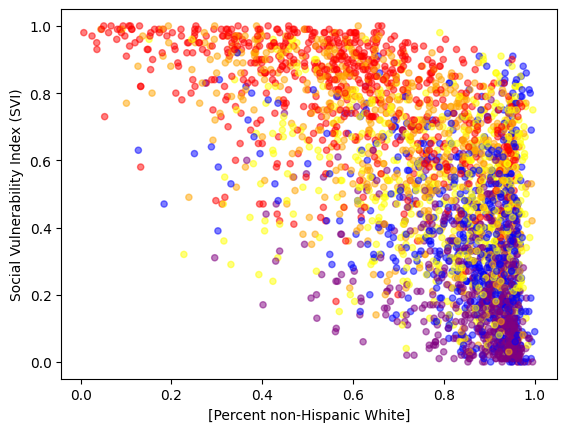

In [38]:
colors = hesitancy_df['CVAC Level Of Concern'].map({
    'Very High Concern' : 'red',
    'High Concern' : 'orange',
    'Moderate Concern' : 'yellow',
    'Low Concern' : 'blue',
    'Very Low Concern' : 'purple',
    
})

hesitancy_df.plot.scatter(x=['Percent non-Hispanic White'], y='Social Vulnerability Index (SVI)', c = colors, alpha = 0.5)